📌 Extracão

In [236]:
import pandas as pd

-> lendo arquivo

In [237]:
import requests

df = pd.read_json('TelecomX_Data.json')
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


🔧 Transformação

Expandir as colunas

In [238]:
# Expandir a coluna 'customer'
customer_df = pd.json_normalize(df['customer'])
df = df.drop(columns='customer').join(customer_df)

# Expandir a coluna 'phone'
phone_df = pd.json_normalize(df['phone'])
df = df.drop(columns='phone').join(phone_df)

# Expandir a coluna 'internet'
internet_df = pd.json_normalize(df['internet'])
df = df.drop(columns='internet').join(internet_df)

# Expandir a coluna 'account'
account_df = pd.json_normalize(df['account'])
df = df.drop(columns='account').join(account_df)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Verificar estrutura e tipos de dados

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [240]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].isnull().sum()  # Verifica se há NaN

np.int64(11)

In [241]:
df.dropna(subset=['Charges.Total'], inplace=True)

In [242]:
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [243]:
# Verificar os valores únicos das colunas categóricas
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns:
    print(f'{col}: {df[col].unique()}')


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [244]:
df['Churn'].value_counts(dropna=False)
df = df[df['Churn'].str.strip() != '']

In [245]:
cols_phone = ['MultipleLines']
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituir "No phone service" por "No"
for col in cols_phone:
    df[col] = df[col].replace('No phone service', 'No')

# Substituir "No internet service" por "No"
for col in cols_internet:
    df[col] = df[col].replace('No internet service', 'No')


In [246]:
# Verificar os valores únicos das colunas categóricas
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns:
    print(f'{col}: {df[col].unique()}')


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [247]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [248]:
# Criando a nova coluna 'Contas_Diarias' a partir de 'Charges.Monthly'
df['Contas_Diarias'] = df['Charges.Monthly'] / 30  # ou 30.44 para mais precisão

df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [249]:
print(df.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']


In [250]:
# 1. Primeiro, padroniza os textos removendo espaços extras e convertendo para string
df = df.map(lambda x: str(x).strip() if isinstance(x, str) else x)

# 2. Substitui valores como 'No internet service' por 'No'
df = df.replace(['No internet service', 'No phone service'], 'No')

# 3. Agora converte automaticamente colunas com apenas 'Yes' e 'No' em 1 e 0
for col in df.columns:
    if df[col].dropna().isin(['Yes', 'No']).all():
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [251]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [252]:
df.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Telefone_Ativo',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total',
    'Churn': 'Evasao',
    'Contas_Diarias': 'Custo_Diario'
}, inplace=True)
df

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Custo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [253]:
# Dicionário de traduções
valores_traduzidos = {
    'Yes': 'Sim',
    'No': 'Não',
    'Female': 'Feminino',
    'Male': 'Masculino',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No internet service': 'Sem internet',
    'No phone service': 'Sem telefone',
    'Month-to-month': 'Mensal',
    'One year': '1 ano',
    'Two year': '2 anos',
    'Mailed check': 'Boleto enviado',
    'Electronic check': 'Débito eletrônico',
    'Bank transfer (automatic)': 'Transferência bancária',
    'Credit card (automatic)': 'Cartão de crédito'
}

# Substitui todos os valores no DataFrame
df.replace(valores_traduzidos, inplace=True)
df

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Custo_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,1 ano,1,Boleto enviado,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Boleto enviado,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mensal,1,Débito eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mensal,1,Débito eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mensal,1,Boleto enviado,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Feminino,0,0,0,13,1,0,DSL,...,0,1,0,0,1 ano,0,Boleto enviado,55.15,742.90,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fibra óptica,...,0,0,0,1,Mensal,1,Débito eletrônico,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensal,1,Boleto enviado,50.30,92.75,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,2 anos,0,Boleto enviado,67.85,4627.65,2.261667


📊 Carga e análise

In [254]:
# Análise descritiva geral (média, mediana, desvio padrão, etc.)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Evasao,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
Idoso,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
Possui_Parceiro,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
Possui_Dependentes,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
Meses_Contrato,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
Telefone_Ativo,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
Multiplas_Linhas,7032.0,0.421928,0.493902,0.000000,0.00000,0.000,1.000000,1.000000
Seguranca_Online,7032.0,0.286547,0.452180,0.000000,0.00000,0.000,1.000000,1.000000
Backup_Online,7032.0,0.344852,0.475354,0.000000,0.00000,0.000,1.000000,1.000000
Protecao_Dispositivo,7032.0,0.343857,0.475028,0.000000,0.00000,0.000,1.000000,1.000000


In [255]:
for col in df.select_dtypes(include='object').columns:
    if col != 'ID_Cliente':
        print(f'\n{col}')
        print(df[col].value_counts())


Genero
Genero
Masculino    3549
Feminino     3483
Name: count, dtype: int64

Tipo_Internet
Tipo_Internet
Fibra óptica    3096
DSL             2416
Não             1520
Name: count, dtype: int64

Tipo_Contrato
Tipo_Contrato
Mensal    3875
2 anos    1685
1 ano     1472
Name: count, dtype: int64

Metodo_Pagamento
Metodo_Pagamento
Débito eletrônico         2365
Boleto enviado            1604
Transferência bancária    1542
Cartão de crédito         1521
Name: count, dtype: int64


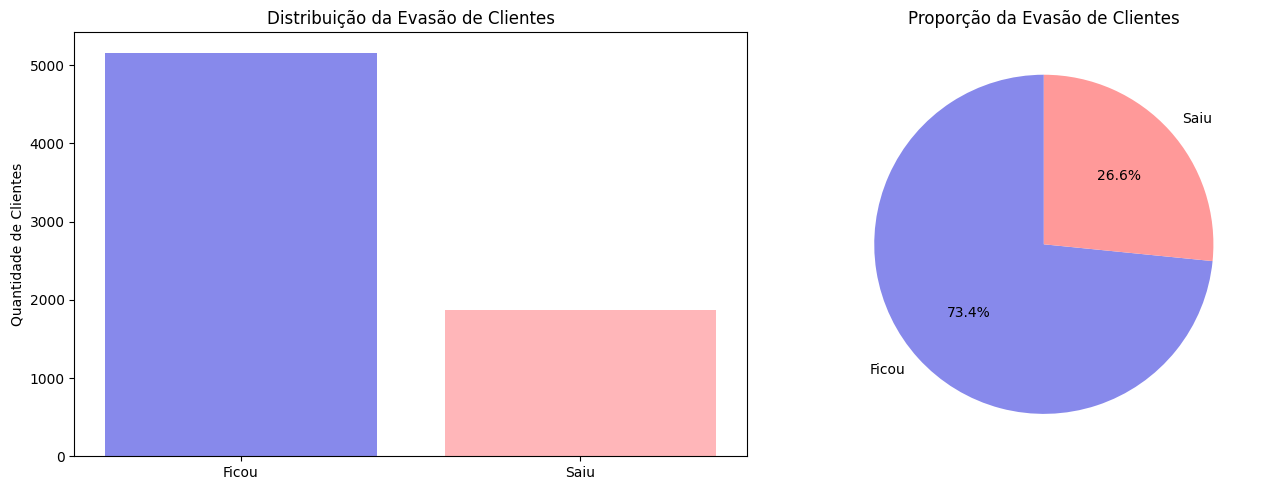

In [269]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(df_churn['Evasao'], df_churn['Quantidade'], color=['#8789EB', '#FFB6B9'])
axes[0].set_title('Distribuição da Evasão de Clientes')
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Ficou', 'Saiu'])

# Gráfico de pizza
axes[1].pie(
    contagem.values, 
    labels=['Ficou', 'Saiu'], 
    autopct='%1.1f%%', 
    colors=['#8789EB', '#FF9999'],
    startangle=90
)
axes[1].set_title('Proporção da Evasão de Clientes')

plt.tight_layout()
plt.show()


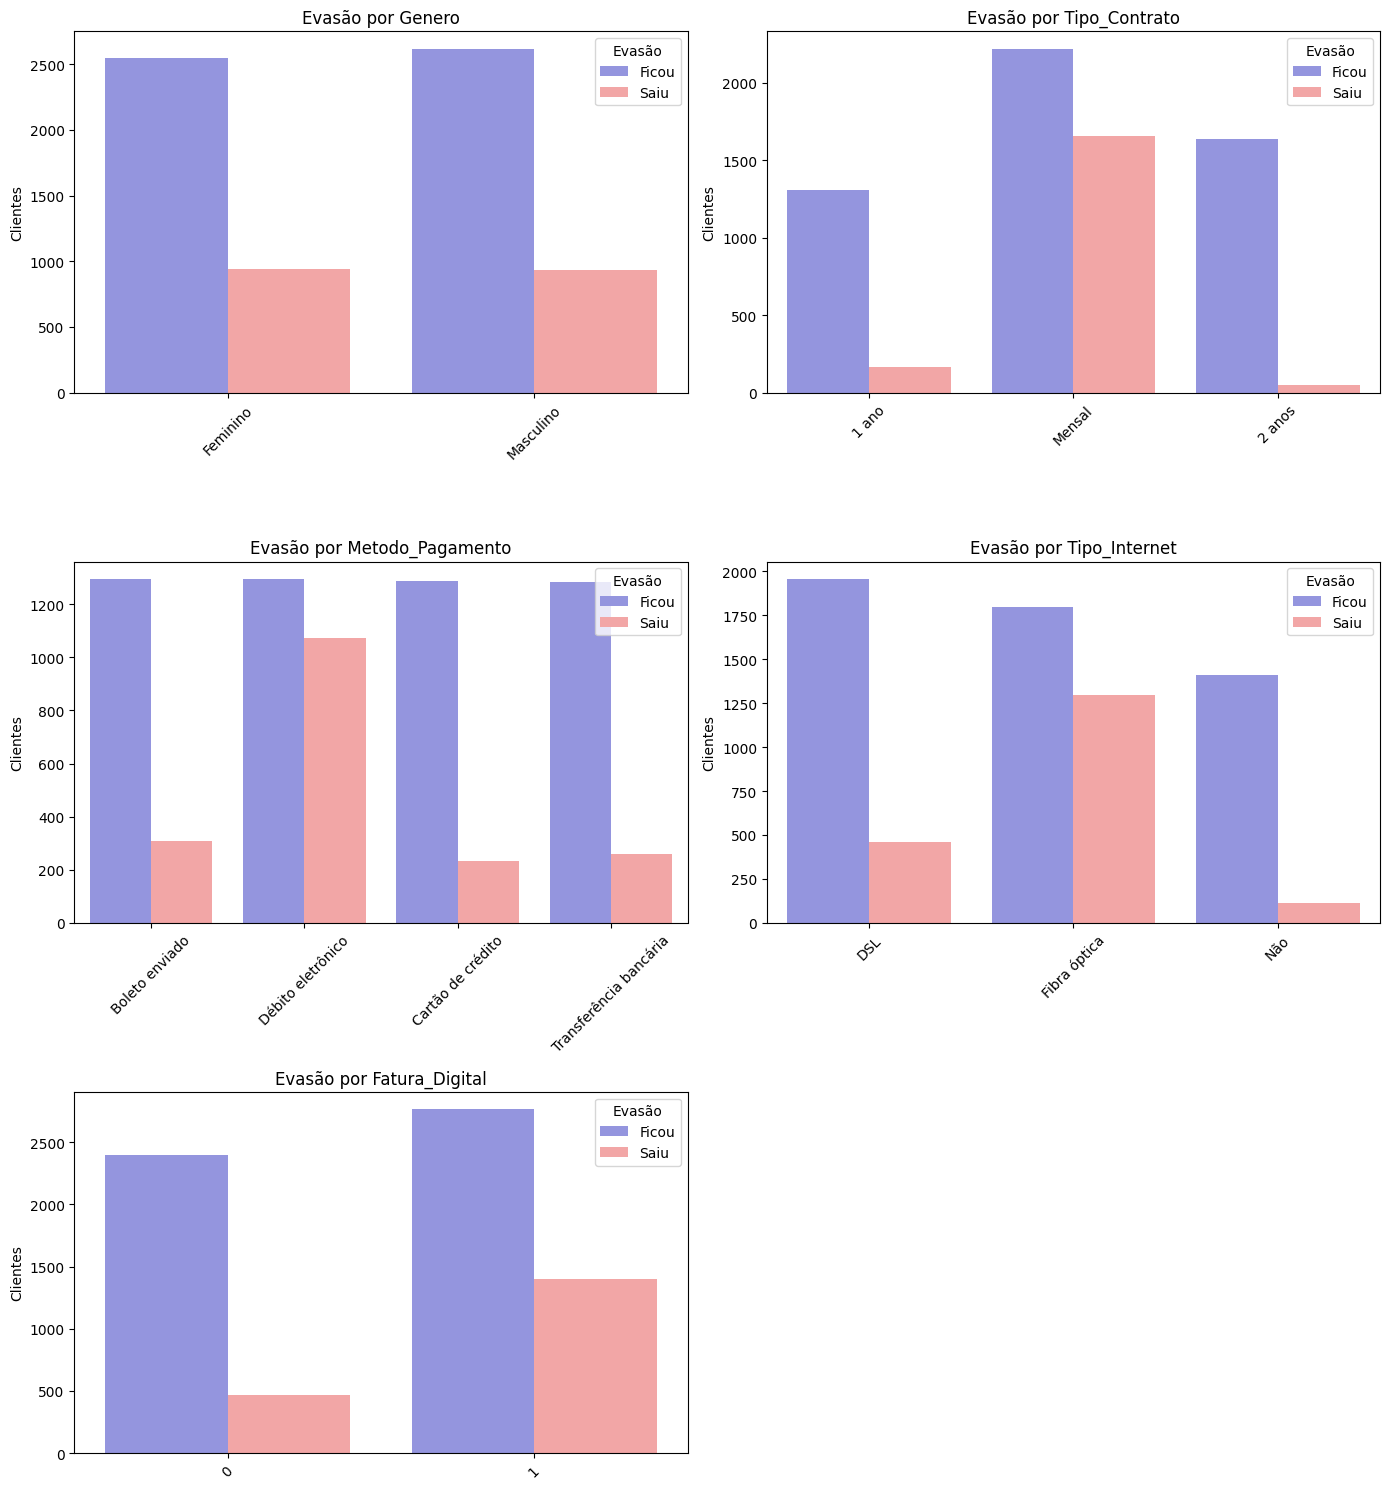

In [268]:
categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pagamento', 'Tipo_Internet', 'Fatura_Digital']

# Define número de colunas e linhas para o grid
n_cols = 2
n_rows = (len(categoricas) + 1) // n_cols  # calcula linhas necessárias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(data=df, x=col, hue='Evasao', palette=['#8789EB', '#FF9999'], ax=axes[i])
    axes[i].set_title(f'Evasão por {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Clientes')
    axes[i].legend(title='Evasão', labels=['Ficou', 'Saiu'])
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

# Remove eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📄Relatorio Final